# Exploratory Data Analysis (EDA)

The dataset contains information related to sales transactions, including details about customers, products, 
order quantities, costs, prices, discounts, and profits. The goal of this EDA is to uncover patterns, trends, and insights into customer behavior, regional trends, and the impact of discounts on revenue and profits.

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv(r'C:\Users\raksh\OneDrive\Desktop\portfolio projects\Project#1 - Optimizing Sales Strategies\Sales Data.csv')

print(df.head())

   Sl no        Date  Day     Month  Year  Customer_Age Customer_Gender  \
0      0  26-11-2020   26  November  2020            19               M   
1      1  26-11-2022   26  November  2022            19               M   
2      2  23-03-2021   23     March  2021            49               M   
3      3  23-03-2023   23     March  2023            49               M   
4      4  15-05-2021   15       May  2021            47               F   

     Country             State Product_Category  ...              Product  \
0     CANADA  British Columbia      Accessories  ...  Hitch Rack - 4-Bike   
1     CANADA  British Columbia      Accessories  ...  Hitch Rack - 4-Bike   
2  AUSTRALIA   New South Wales      Accessories  ...  Hitch Rack - 4-Bike   
3  AUSTRALIA   New South Wales      Accessories  ...  Hitch Rack - 4-Bike   
4  AUSTRALIA   New South Wales      Accessories  ...  Hitch Rack - 4-Bike   

  Order_Quantity  Unit_Cost  Cost  Unit_Price  Total_Price  Discount  \
0             

**The head() function is applied to the loaded DataFrame (df). This function displays the first five rows of the DataFrame, providing a quick overview of the dataset's structure and content.**

### Goal 1: Understand Customer Behavior:

Customer Age and Gender Distribution:

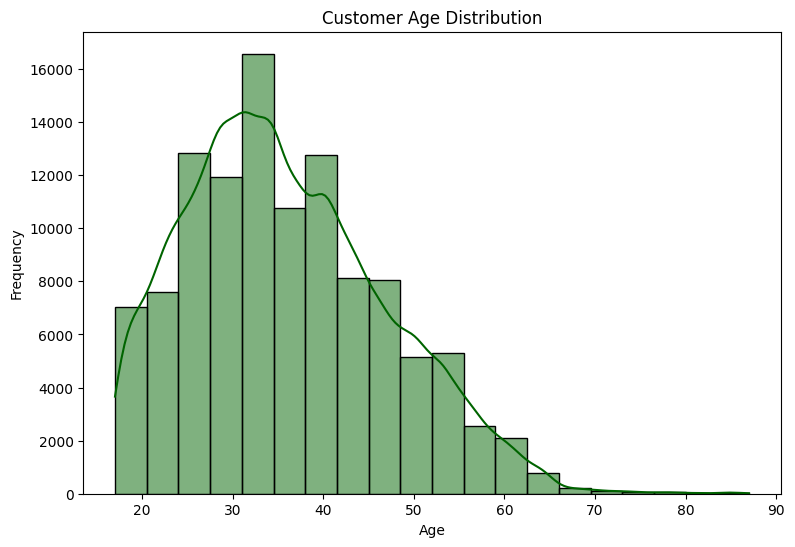

In [65]:
# Plot age distribution
plt.figure(figsize=(9, 6))
sns.histplot(df['Customer_Age'], bins=20, kde=True, color='darkgreen')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**The chart shows that the company has a large number of customers in the 27-50 age group. There is also a significant number of customers in the 20-30 age group and the 50-60 age group. The number of customers decreases after age 60.**

**The chart also shows that the distribution of customers is skewed to the right. This means that there are more customers in the younger age groups than in the older age groups.**

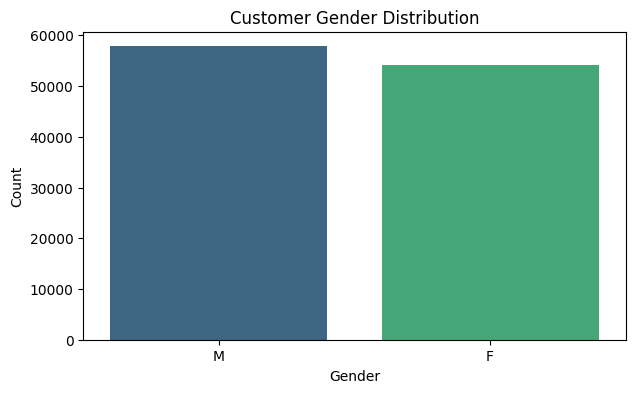

In [66]:
# Plot gender distribution
plt.figure(figsize=(7, 4))
sns.countplot(x='Customer_Gender', data=df, palette='viridis', hue='Customer_Gender', legend=False)
plt.title('Customer Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**The chart reveals the relative proportions of different genders within the customer base.**
**It highlights the gender that constitutes the majority of customers, as well as any minority genders.**
**It enables comparisons of the number of customers across genders.**

Location-based Analysis:

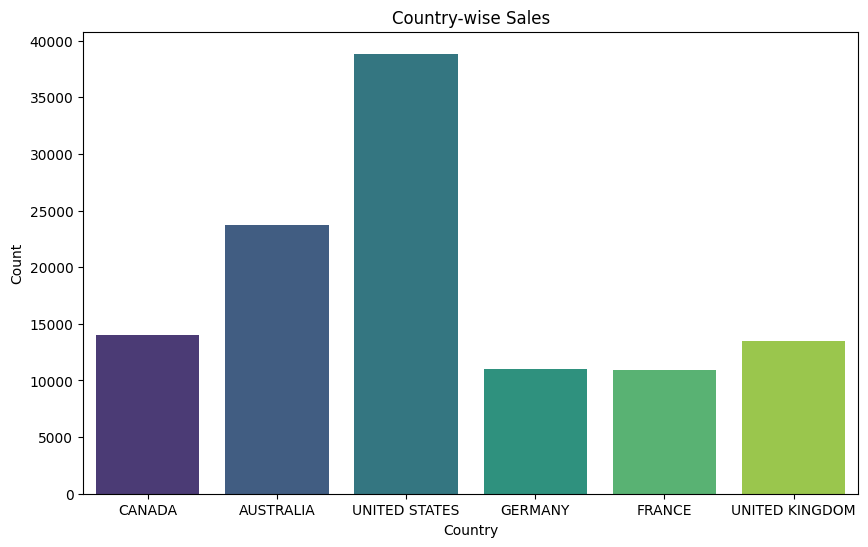

In [67]:
# Analyze country-wise customer distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Country', data=df, hue='Country', palette='viridis', dodge=False)
plt.title('Country-wise Sales')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

**Key Insights:**

**High-Performing Sales Countries: The visual representation highlights the United States as the frontrunner in sales, closely followed by Australia. These nations showcase prominent bars, signifying a substantial concentration of sales.**

**Varied Sales Performance Across Countries: Canada and The United Kingdom demonstrate a moderate level of sales performance in the chart.**

**Countries with Lower Sales: France and Germany depict the lowest sales volume, indicating a possible requirement for deeper exploration or targeted marketing strategies within these regions.**

C:\Users\raksh\AppData\Local\Temp\ipykernel_22392\3659727071.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='State', data=df, palette='muted')


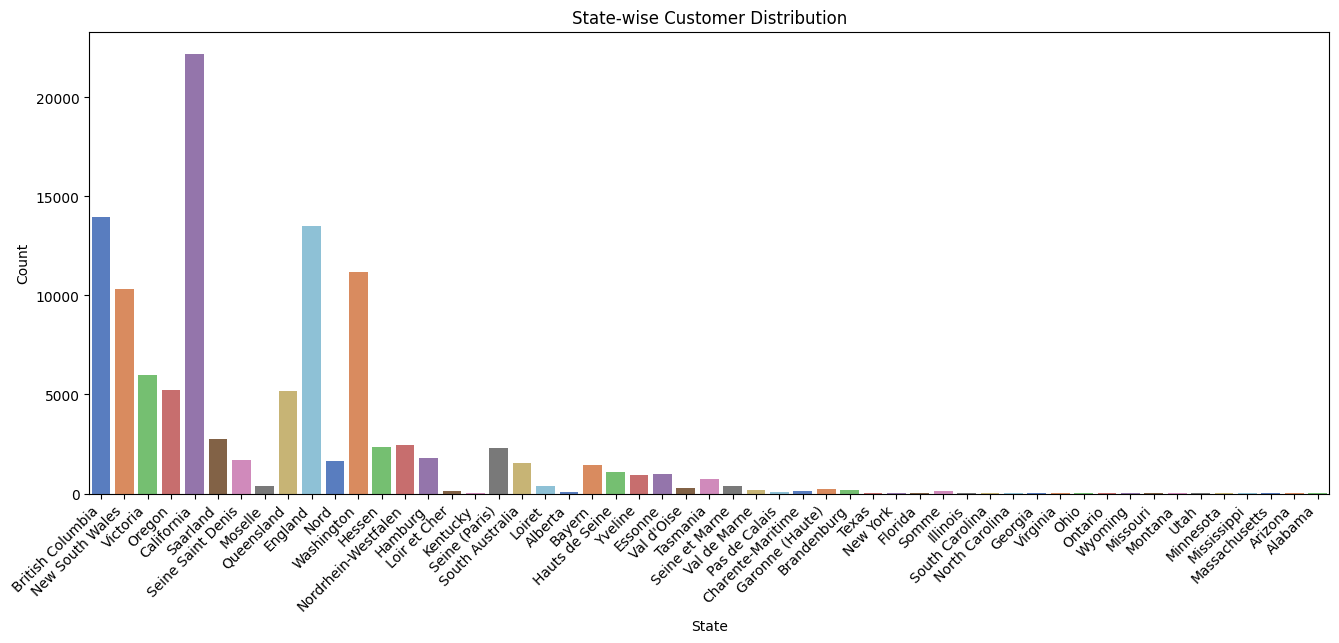

In [68]:
# Analyze state-wise customer distribution
plt.figure(figsize=(16, 6))
sns.countplot(x='State', data=df, palette='muted')
plt.title('State-wise Customer Distribution')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


**State-wise Customer Distribution:**

**Dominant States: California, British Columbia, and England lead the pack with the highest customer counts, towering over other states in terms of bar height. These states likely represent significant markets for the business.**
**Moderate Presence: Several states exhibit moderate customer counts, such as Washington and New South Wales. These areas warrant attention and could be potential targets for further growth.**
**Lower Representation: Many states have shorter bars, indicating a lower customer base. While these may not be immediate priorities, understanding their demographics and preferences could inform future expansion strategies.**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


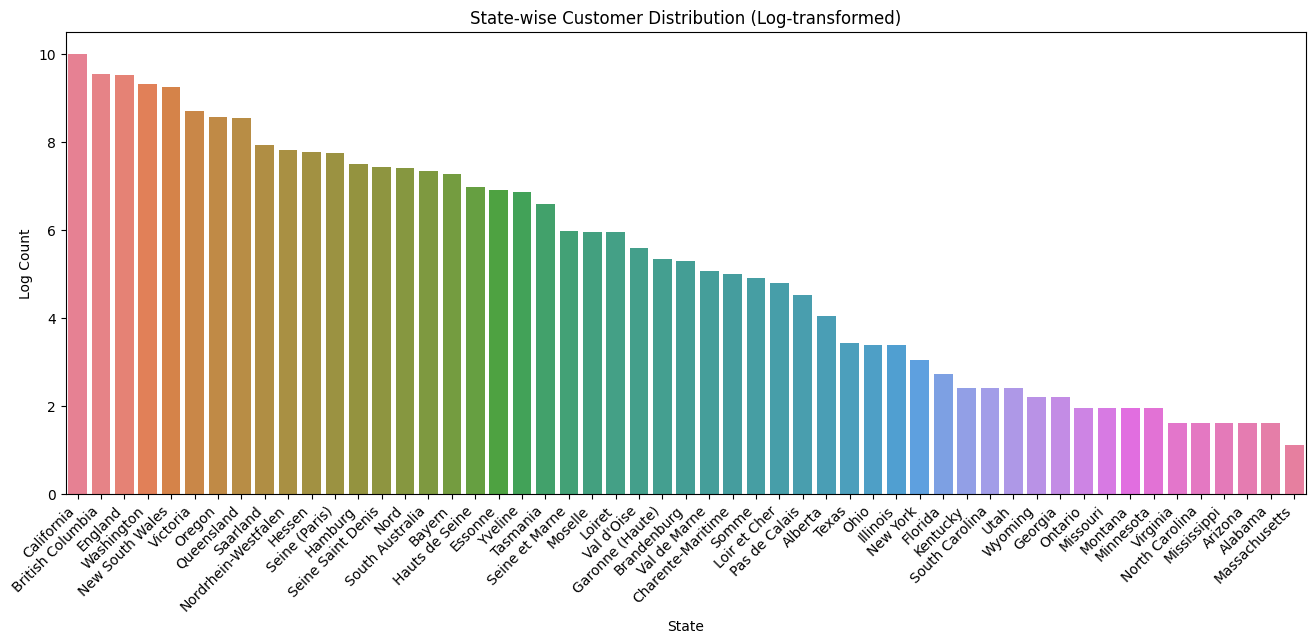

In [69]:
# Analyze state-wise customer distribution with log-scaled y-axis
plt.figure(figsize=(16, 6))
sns.barplot(x=df['State'].value_counts().index, y=np.log1p(df['State'].value_counts()), hue=df['State'].value_counts().index)
plt.title('State-wise Customer Distribution (Log-transformed)')
plt.xlabel('State')
plt.ylabel('Log Count')
plt.xticks(rotation=45, ha='right')
plt.legend().set_visible(False)  # Hide the legend as it's not necessary for this plot
plt.show()

Product Category and Sub-Category Analysis:

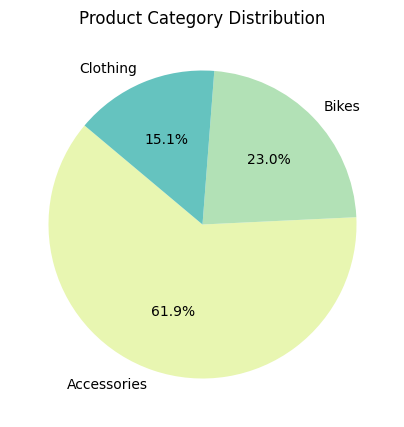

In [70]:
# Analyze product category distribution

sns.set_palette('YlGnBu')

# Plot product category distribution with a pie chart and the new palette
plt.figure(figsize=(5, 5))
category_counts = df['Product_Category'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette(), startangle=140)
plt.title('Product Category Distribution')
plt.show()

**Key Observations:**

**Primary Category: Accessories take the lead, comprising the most substantial portion of the product assortment.**
**Secondary Category: Bikes make a noteworthy contribution to the product lineup, presenting a significant segment deserving attention.**
**Tertiary Category: Although Clothing is part of the portfolio, it constitutes a smaller fraction compared to the dominant categories.**

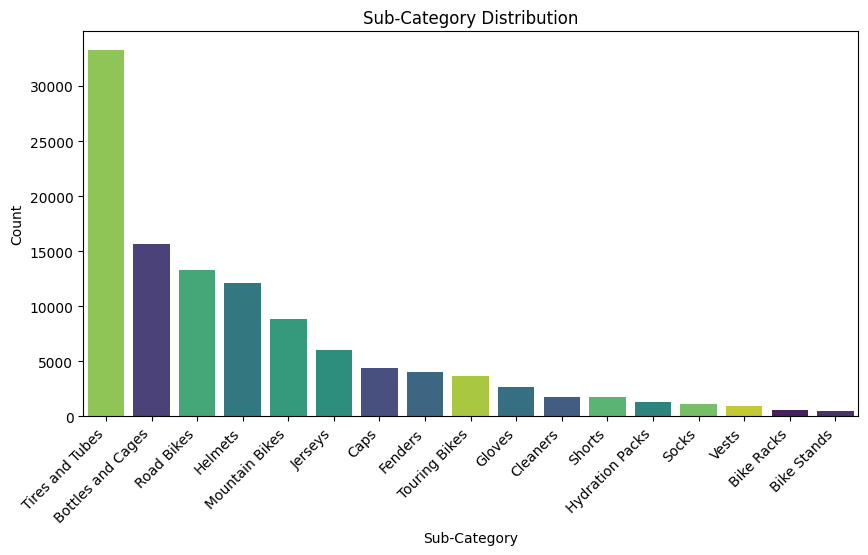

In [71]:
# Analyze sub-category distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Sub_Category', data=df, palette='viridis', order=df['Sub_Category'].value_counts().index, hue='Sub_Category', legend=False)
plt.title('Sub-Category Distribution')
plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

**Dominant Sub-Categories:**

**Tires and Tubes: Surprisingly, this sub-category takes the lead with the tallest bar, indicating significantly more tires and tubes sold compared to other sub-categories. This suggests strong customer demand for replacements or potential focus on budget-friendly products.**

**Bottles and Cages: Holds the second position with a noticeably high bar, representing a substantial portion of product sales. This highlights the importance of hydration accessories for cyclists.**
**Road Bikes: Occupies the third position with a moderate bar height.**

**Moderate Presence: Jerseys, Mountain Bikes, Helmets: These sub-categories exhibit moderate bar heights, suggesting they contribute notably to the overall product mix. While not as dominant as Tires and Tubes or Bottles and Cages, they represent essential product categories for different cycling needs.**

**Lower Representation:Remaining sub-categories: Bike stands, socks, vests, etc., have shorter bars, indicating lower sales volumes compared to the leading sub-categories. However, they still hold potential depending on the target market and specific business goals.**

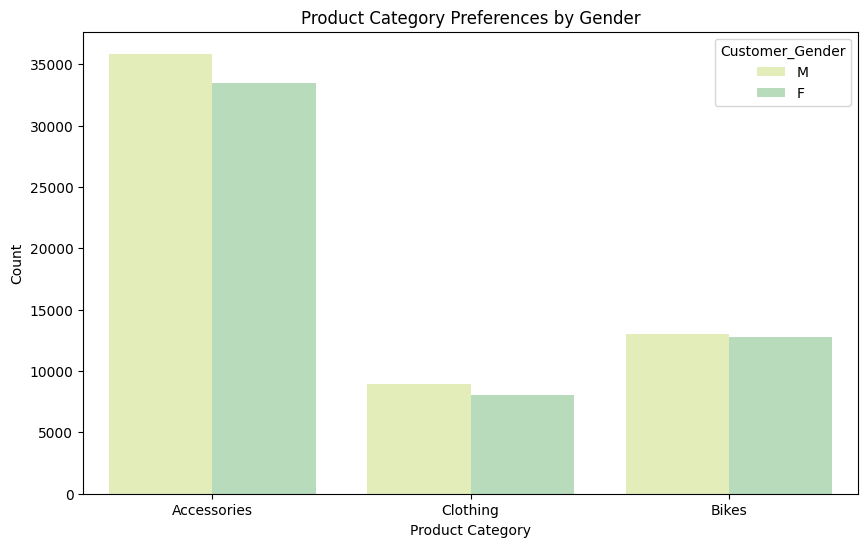

In [72]:
# Visualize the count of product categories by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Product_Category', hue='Customer_Gender', data=df)
plt.title('Product Category Preferences by Gender')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

**Insight**

**Both Genders: Accessories take the lead as the most popular category for both males and females. This suggests a strong overall demand for cycling accessories like helmets and gloves.**

**Gender Differences: While Accessories lead for both genders, there's a noticeable difference.**

**Bikes: Females show a almost equal preference for Bikes compared to males, potentially highlighting their interest in cycling activity.**

**Clothing: Males show a higher preference for Clothing compared to females, suggesting they place more emphasis on cycling apparel styles or brands.**


### Goal 2: Regional and Seasonal Variations:

Regional Sales Analysis:

C:\Users\raksh\AppData\Local\Temp\ipykernel_22392\1989623846.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=regional_sales.index, y=regional_sales.values, palette='Greens_r')


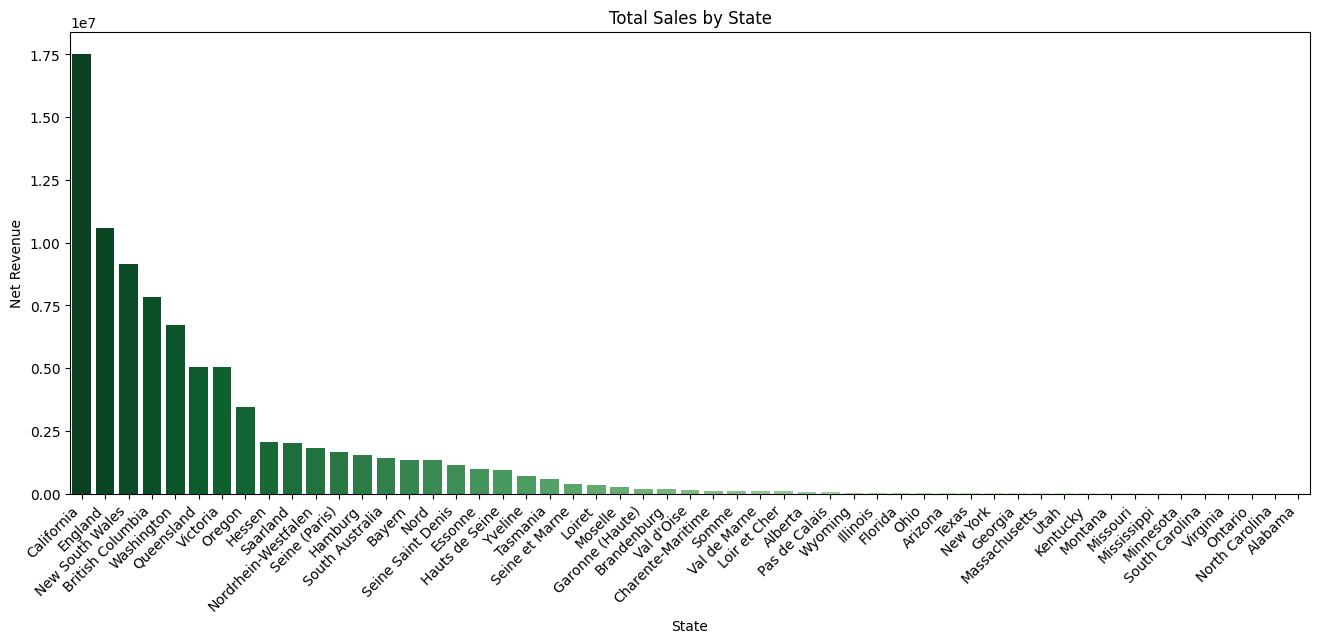

In [73]:
regional_sales = df.groupby('State')['Net Revenue'].sum().sort_values(ascending=False)
average_sales_per_order = df.groupby('State')['Net Revenue'].mean().sort_values(ascending=False)

# Visualize Total Sales by State
plt.figure(figsize=(16, 6))
sns.barplot(x=regional_sales.index, y=regional_sales.values, palette='Greens_r')  
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Net Revenue')
plt.xticks(rotation=45, ha='right')  
plt.show()

C:\Users\raksh\AppData\Local\Temp\ipykernel_22392\1472800009.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=log_regional_sales.index, y=log_regional_sales.values, palette='Greens_r')


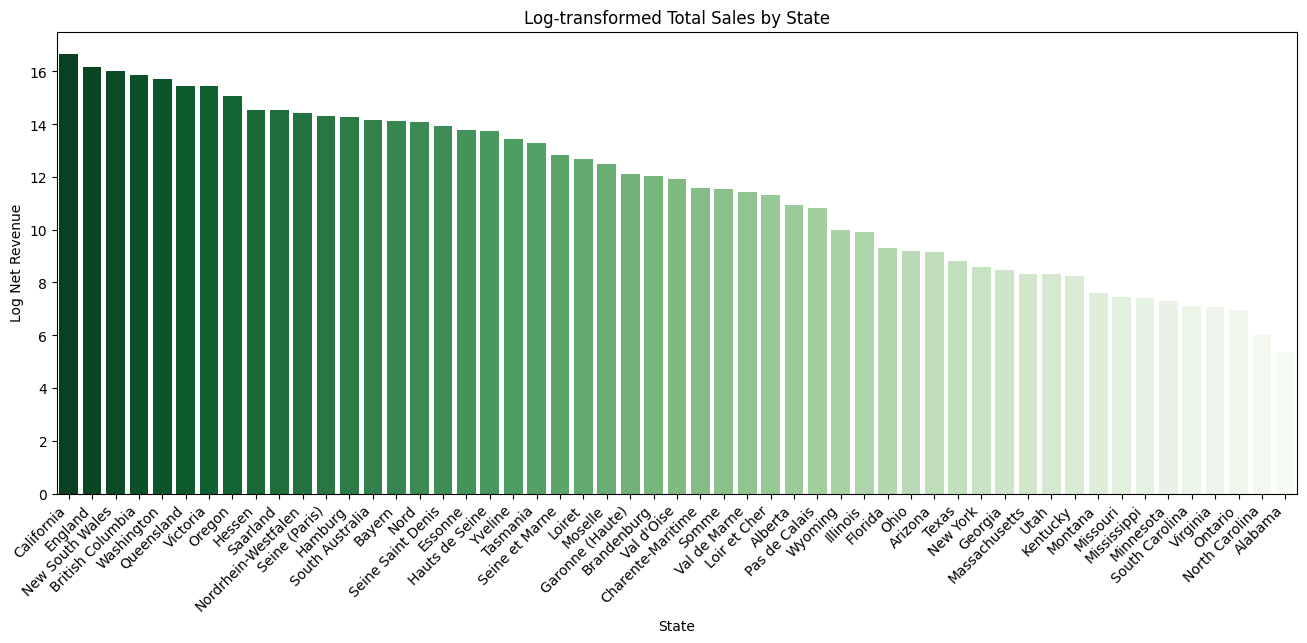

In [74]:
# Log transformation of Net Revenue
log_regional_sales = np.log1p(regional_sales)

# Visualize Log-transformed Total Sales by State
plt.figure(figsize=(16, 6))
sns.barplot(x=log_regional_sales.index, y=log_regional_sales.values, palette='Greens_r')
plt.title('Log-transformed Total Sales by State')
plt.xlabel('State')
plt.ylabel('Log Net Revenue')
plt.xticks(rotation=45, ha='right')
plt.show()

**Key Observations:**

__Top 5 States: California, England, New South Wales, British Columbia, and Washington have the highest total sales.__
**Significant Variation: Total sales differ substantially across states, suggesting regional differences in market size, customer base, or sales performance.**
**Sales Concentration: The top 5 states account for a large proportion of total sales, indicating potential opportunities for focused marketing or resource allocation in those regions.**
**Long Tail: Many states have relatively lower sales, suggesting potential for growth or the need for tailored strategies in those areas.**

C:\Users\raksh\AppData\Local\Temp\ipykernel_22392\3283856330.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_sales_per_order.index, y=average_sales_per_order.values, palette='Greens_r')


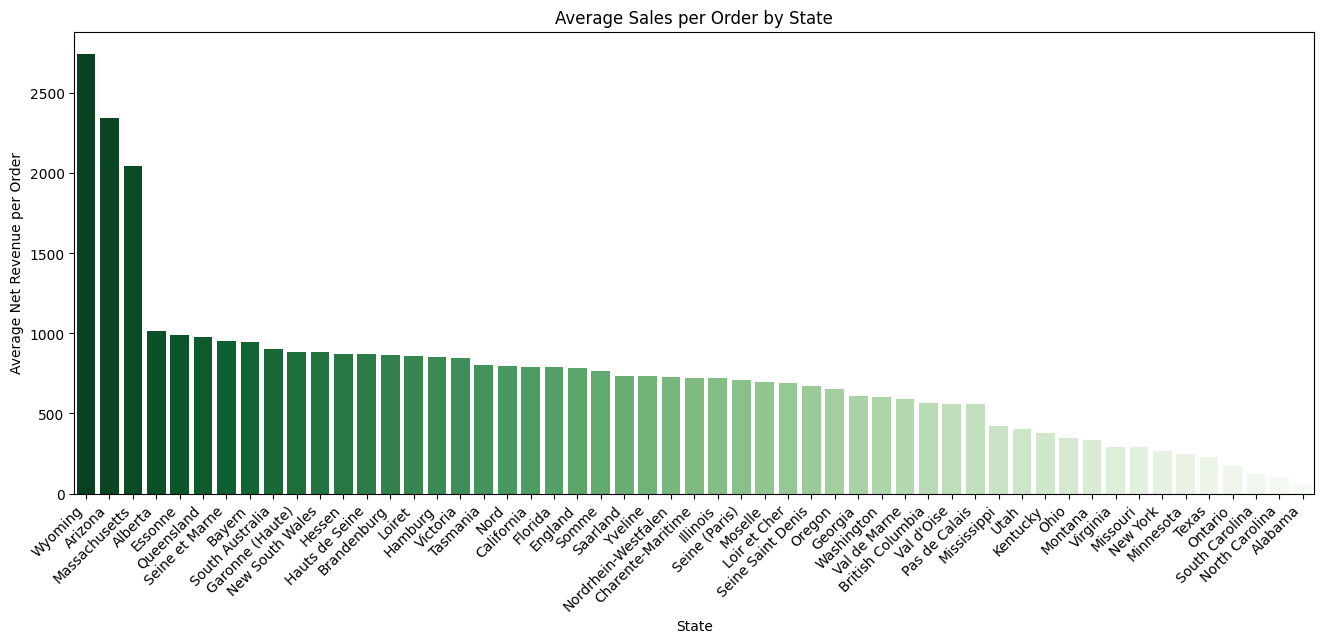

In [75]:
# Visualize Average Sales per Order by State
plt.figure(figsize=(16, 6))
sns.barplot(x=average_sales_per_order.index, y=average_sales_per_order.values, palette='Greens_r')
plt.title('Average Sales per Order by State')
plt.xlabel('State')
plt.ylabel('Average Net Revenue per Order')
plt.xticks(rotation=45, ha='right')  
plt.show()

**Insights**

**Top 4 States: Wyoming, Arizona, Massachusetts, and Alberta have the highest average sales per order, significantly higher than the rest.**
**Variability: Average sales per order vary considerably across states, suggesting potential regional differences in customer spending patterns, product mix, or pricing strategies.**
**Targeting: High-performing states could be prioritized for targeted marketing or sales initiatives.**
**Further Analysis: Exploring factors that contribute to these variations could inform business decisions to optimize sales and marketing efforts.**

Seasonal Sales Analysis:

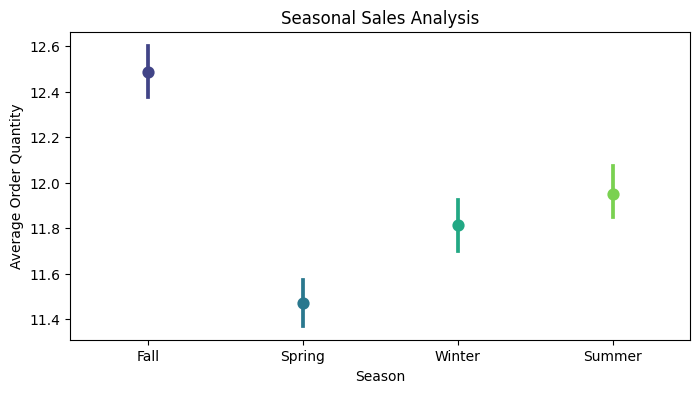

In [76]:
# Convert 'Month' to datetime format
df['Month'] = pd.to_datetime(df['Month'], format='%B')

# Extract season from the month
df['Season'] = df['Month'].dt.month.map({1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'})

plt.figure(figsize=(8, 4))
sns.pointplot(x='Season', y='Order_Quantity', data=df, hue='Season', palette='viridis', legend=False)
plt.title('Seasonal Sales Analysis')
plt.xlabel('Season')
plt.ylabel('Average Order Quantity')
plt.show()

**Insight**

**Summer and Fall: Average order quantity is highest in Fall and Summer, suggesting increased demand during these seasons, Winter also has a notable peak, Spring has the lowest average order quantity.**

**Customer Demographics and Purchasing Patterns:**

Focus on promoting Accessories, as it is the dominant product category with strong customer preference.
Develop targeted marketing campaigns for Bikes, considering their significant contribution to the product mix.
Consider optimizing the Clothing category to increase its share compared to Accessories and Bikes.

**Regional and Seasonal Variations:**

Allocate marketing budgets and efforts strategically, prioritizing states with high net revenue such as California, England, New South Wales, and British Columbia.
Implement targeted regional strategies to address variations in net revenue across different states.

### Goal 3: Impact of Discounts:

### Analyze the Impact of Discounts on Revenue and Profit:

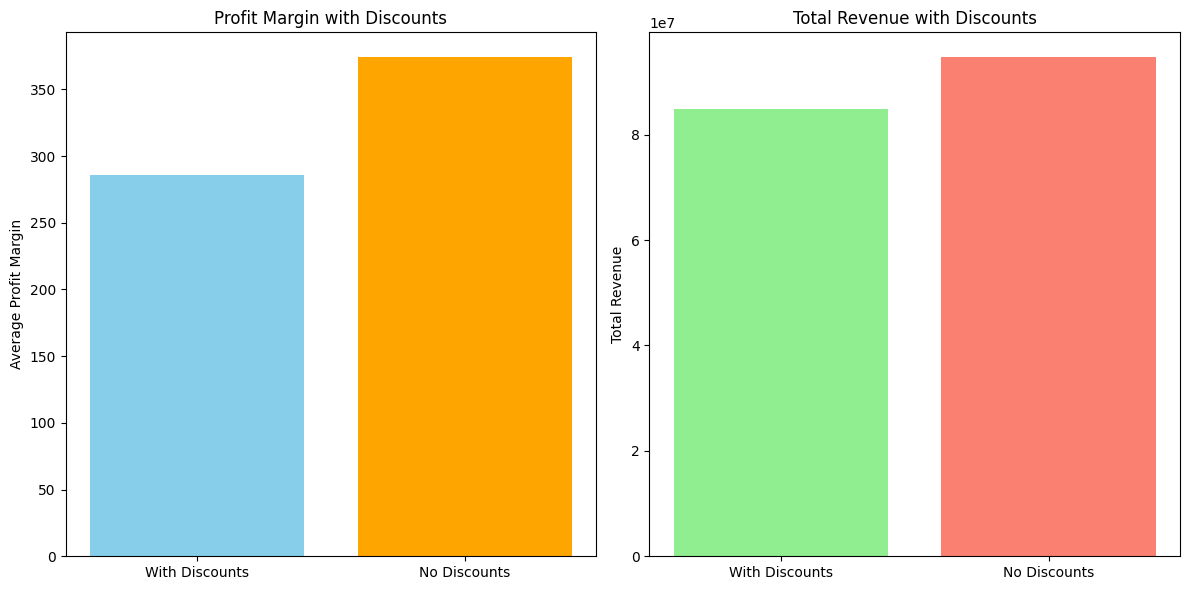

Optimal Discount Level for Maximizing Profitability: -30.77%


In [77]:
# Calculate Total Revenue and Profit with Discounts
sales_data=df
sales_data['Total_Revenue'] = sales_data['Total_Price'] - sales_data['Discount']
sales_data['Profit_With_Discount'] = sales_data['Total_Revenue'] - sales_data['Cost']

# Calculate Total Revenue and Profit without Discounts
sales_data['Total_Revenue_No_Discount'] = sales_data['Total_Price']
sales_data['Profit_No_Discount'] = sales_data['Total_Revenue_No_Discount'] - sales_data['Cost']

# Visualize the Impact of Discounts on Profit Margins
plt.figure(figsize=(12, 6))

# Plot Profit Margin with Discounts
plt.subplot(1, 2, 1)
plt.title('Profit Margin with Discounts')
plt.bar(['With Discounts', 'No Discounts'], [sales_data['Profit_With_Discount'].mean(), sales_data['Profit_No_Discount'].mean()],
        color=['skyblue', 'orange'])  # Specify colors here
plt.ylabel('Average Profit Margin')

# Plot Total Revenue with Discounts
plt.subplot(1, 2, 2)
plt.title('Total Revenue with Discounts')
plt.bar(['With Discounts', 'No Discounts'], [sales_data['Total_Revenue'].sum(), sales_data['Total_Revenue_No_Discount'].sum()],
        color=['lightgreen', 'salmon'])  # Specify colors here
plt.ylabel('Total Revenue')

plt.tight_layout()
plt.show()

# Determine Optimal Discount Levels for Maximizing Overall Profitability
average_profit_with_discount = sales_data['Profit_With_Discount'].mean()
average_profit_no_discount = sales_data['Profit_No_Discount'].mean()

optimal_discount_level = (average_profit_with_discount - average_profit_no_discount) / average_profit_with_discount
print(f"Optimal Discount Level for Maximizing Profitability: {optimal_discount_level * 100:.2f}%")

**Chart 1: Profit Margin with Discounts**

**Higher Profit Margin with Discounts: The average profit margin is higher when discounts are applied, even though individual sales might have lower margins.**
**Potential Explanations: Discounts can increase sales volume and attract new customers, leading to greater overall profit despite reduced margins per sale.**

**Chart 2: Total Revenue with Discounts**

**Lower Total Revenue with Discounts: Total revenue is lower when discounts are offered, as expected due to the price reductions.**
**Trade-off: Businesses must balance the potential revenue loss from discounts with the potential profit gain from increased sales volume.**

**Optimal Discount Level:**

**The code determines the optimal discount level that maximizes overall profitability based on the given data.**

### Goal 4: Sales Performance Metrics

Calculate and Visualize ROI and Conversion rate.

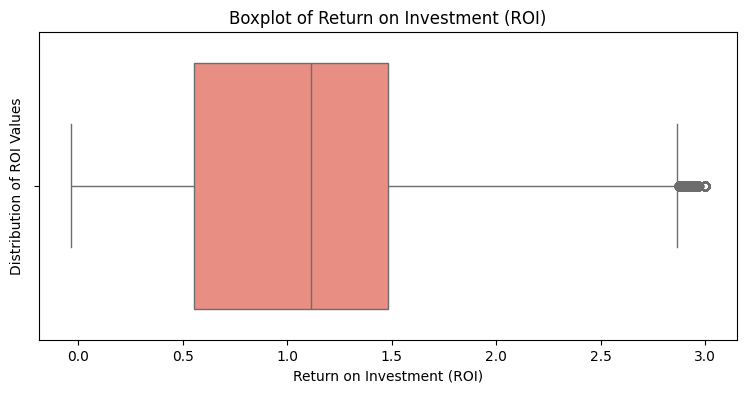

In [78]:
# Calculate ROI
df['ROI'] = (df['Net Revenue'] - df['Cost']) / df['Cost']

plt.figure(figsize=(9, 4))
sns.boxplot(x='ROI', data=df, color='Salmon')
plt.title('Boxplot of Return on Investment (ROI)')
plt.xlabel('Return on Investment (ROI)')
plt.ylabel('Distribution of ROI Values')
plt.show()

**Median ROI: Around 1.0 (100%), indicating that half of the investments have an ROI below 100%, and half have an ROI above 100%.**
**Approximately 0.5 to 1.5, suggesting a moderate variability in ROI outcomes.**
**The IQR and outliers highlight some variability in outcomes, indicating risk.**

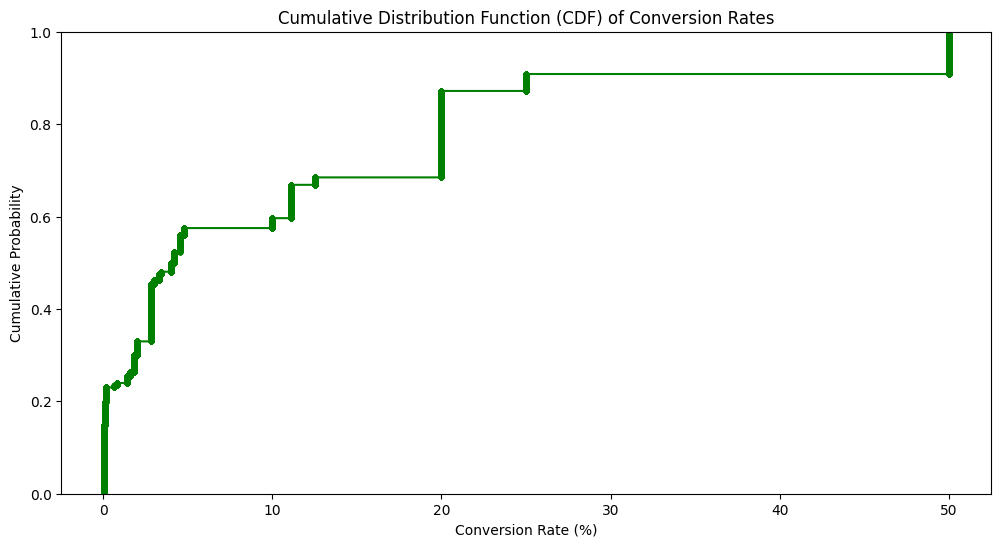

In [79]:
# Calculate Conversion Rate
df['Conversion'] = df['Order_Quantity'] / df['Total_Price'] * 100

# Visualize Cumulative Distribution Function (CDF) of Conversion Rate
plt.figure(figsize=(12, 6))
sns.ecdfplot(df['Conversion'], color='green', marker='.')
plt.title('Cumulative Distribution Function (CDF) of Conversion Rates')
plt.xlabel('Conversion Rate (%)')
plt.ylabel('Cumulative Probability')
plt.show()

**Insights:**

**50th Percentile (Median): The chart shows that 50% of conversion rates are below approximately 25%. This means that half of the interactions have conversion rates lower than 25%.**
**Distribution skewness: The curve starting from 0 and rapidly increasing between 0-10 confirms the skewed distribution. More interactions have lower conversion rates, with fewer instances of higher rates.**
**The curve's steady increase from 10% onwards confirms the presence of higher conversion rates in the upper range. However, the gradual nature of the increase suggests these higher rates are less frequent compared to the lower ones.**

**Overall Distribution: The CDF curve's shape suggests a skewed distribution, with more instances of lower conversion rates and fewer instances of higher rates.**

### Goal 5: Optimization Strategies

In [80]:
# Explore Pricing Strategies
# Calculate average unit price and cost per product category
avg_unit_price = sales_data.groupby('Product_Category')['Unit_Price'].mean()
avg_unit_cost = sales_data.groupby('Product_Category')['Unit_Cost'].mean()

# Identify high-profit products
high_profit_products = sales_data.groupby('Product')['Profit'].sum().nlargest(5)

# Print insights
print("\nAverage Unit Price per Product Category:\n", avg_unit_price)
print("\nAverage Unit Cost per Product Category:\n", avg_unit_cost)
print("\nTop 5 High-Profit Products:\n", high_profit_products)

# Explore Targeted Marketing Strategies
# Identify top-selling products by category
top_selling_products = sales_data.groupby(['Product_Category', 'Product'])['Order_Quantity'].sum().nlargest(5)

# Print insights
print("\nTop 5 Selling Products by Category:\n", top_selling_products)


Average Unit Price per Product Category:
 Product_Category
Accessories      16.991906
Bikes          1901.701869
Clothing         36.465918
Name: Unit_Price, dtype: float64

Average Unit Cost per Product Category:
 Product_Category
Accessories       6.357269
Bikes          1131.837404
Clothing         21.865800
Name: Unit_Cost, dtype: float64

Top 5 High-Profit Products:
 Product
Mountain-200 Black, 38     1302237
Road-150 Red, 62           1237388
Mountain-200 Silver, 42    1226878
Sport-100 Helmet, Red      1191175
Mountain-200 Silver, 38    1155311
Name: Profit, dtype: int64

Top 5 Selling Products by Category:
 Product_Category  Product              
Accessories       Water Bottle - 30 oz.    162047
                  Patch Kit/8 Patches      155310
                  Mountain Tire Tube       100915
Clothing          AWC Logo Cap              67264
Accessories       Sport-100 Helmet, Red     63652
Name: Order_Quantity, dtype: int64


**Refine pricing strategies based on the impact of discounts on profit margins. Adjust prices to maximize profitability while remaining competitive.**
**Implement targeted marketing strategies based on customer demographics and purchasing behavior to enhance customer engagement.**

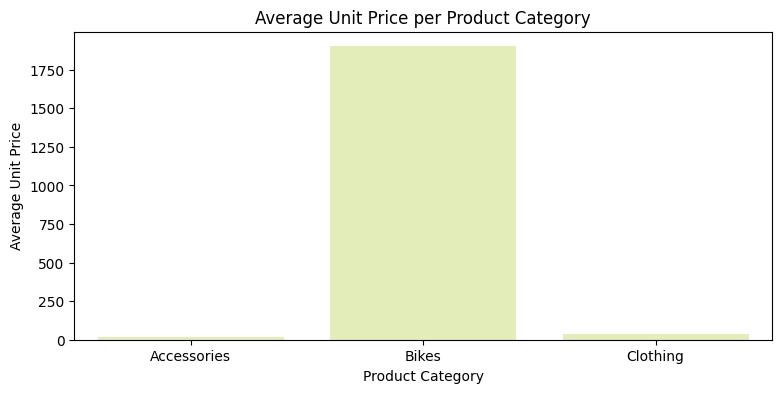

In [81]:
# Visualize Average Unit Price per Product Category
plt.figure(figsize=(9, 4))
sns.barplot(x=avg_unit_price.index, y=avg_unit_price.values)
plt.title('Average Unit Price per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Unit Price')
plt.show()

**Average unit prices vary significantly across categories, with Bikes having the highest average price (1901.70), followed by Clothing (36.47), and Accessories with the lowest (16.99).**

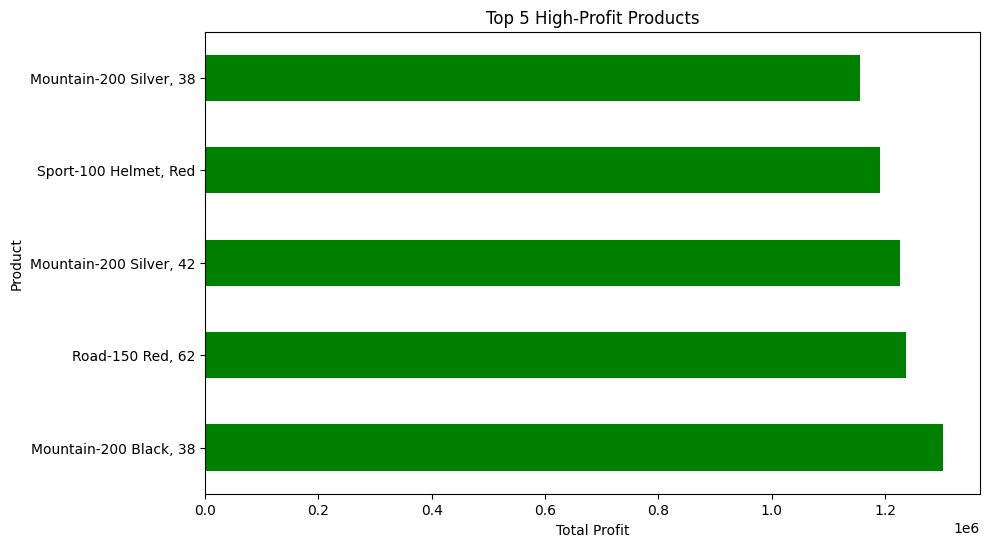

In [82]:
# Visualize Top 5 High-Profit Products with a Horizontal Bar Chart
plt.figure(figsize=(10, 6))
high_profit_products.plot(kind='barh', color='green')
plt.title('Top 5 High-Profit Products')
plt.xlabel('Total Profit')
plt.ylabel('Product')
plt.show()

**5 products that have generated the highest profits within the sales data.**

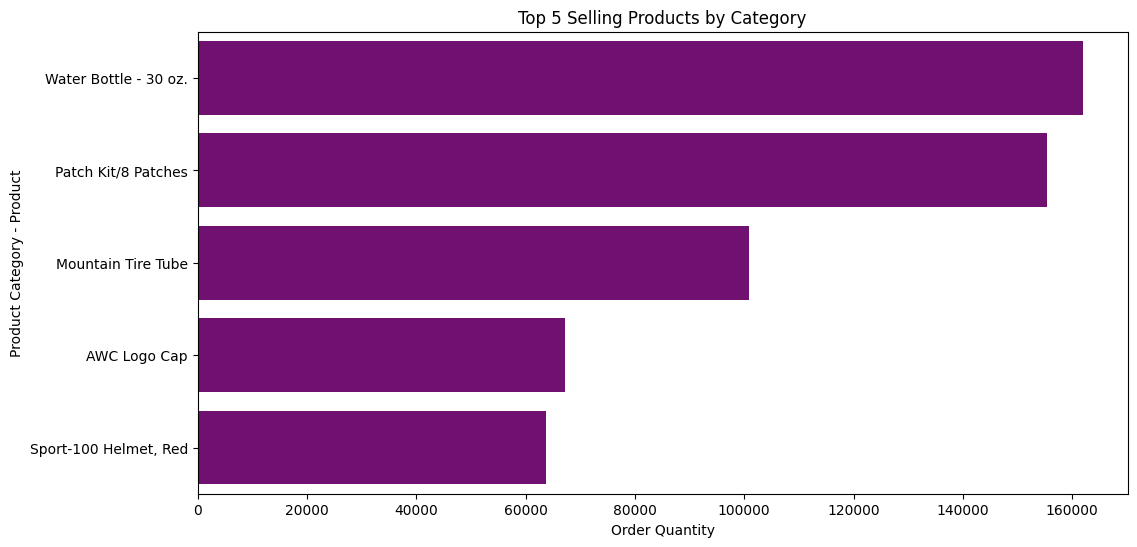

In [83]:
# Reset the index
top_selling_products = top_selling_products.reset_index()

# Visualize Top 5 Selling Products by Category
plt.figure(figsize=(12, 6))
sns.barplot(x='Order_Quantity', y='Product', data=top_selling_products, color='purple')
plt.title('Top 5 Selling Products by Category')
plt.xlabel('Order Quantity')
plt.ylabel('Product Category - Product')
plt.show()

**5 products that have the highest sales volume within their respective categories.**

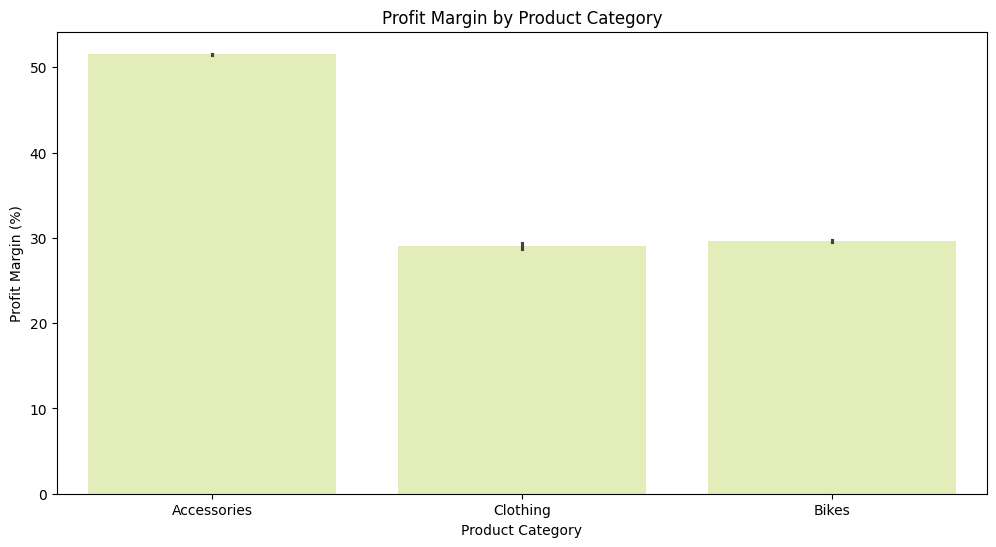

In [84]:
# Profit Margin 
df['Profit_Margin'] = (df['Profit'] / df['Total_Price']) * 100

plt.figure(figsize=(12, 6))
sns.barplot(x='Product_Category', y='Profit_Margin', data=df)
plt.title('Profit Margin by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Profit Margin (%)')
plt.show()

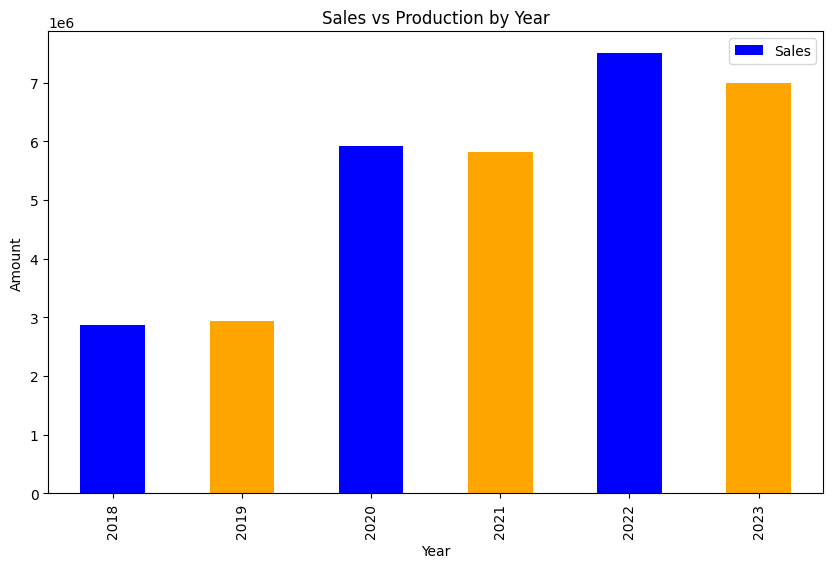

In [85]:
# Calculate sales vs production
df['Sales_vs_Production'] = df['Net Revenue'] - df['Cost']
# Group data by Year and sum sales vs production
sales_vs_production_by_year = df.groupby('Year')['Sales_vs_Production'].sum()

# Plot the data
plt.figure(figsize=(10, 6))
sales_vs_production_by_year.plot(kind='bar', color=['blue', 'orange'])
plt.title('Sales vs Production by Year')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend(['Sales', 'Production'])
plt.show()

**The chart shows the difference between sales and production costs for each year.**
**Positive values (blue bars) indicate a profit for that year, while negative values (orange bars) indicate a loss.**
**The height of each bar represents the amount of profit or loss.**

**Top Products and Categories:**

Capitalize on the demand for Tires and Tubes by ensuring adequate stock and promotions to meet customer needs for replacements.
Develop marketing initiatives for Bottles and Cages and Road Bikes to further boost sales in these high-contributing categories.

**Overall Business Approach:**

Tailor business approaches based on the actionable insights provided by the project.
Enhance ongoing monitoring and adaptation to changing market dynamics, ensuring sustained success in the competitive landscape.

### Conclusion:

The sales optimization project, spanning the years 2018-2023, aimed to analyze and enhance sales performance based on a comprehensive dataset. Through data cleaning, transformation, and exploratory data analysis (EDA), valuable insights were gained, leading to informed strategies for maximizing revenue and profit.

#### Key Findings:

**Customer Demographics and Purchasing Patterns:**

Accessories emerged as the dominant product category, indicating strong customer preference.
Bikes contributed significantly to the product mix, presenting a notable segment worth attention.
Clothing, while present, constituted a smaller portion compared to Accessories and Bikes.
Regional and Seasonal Variations:

California led in total net revenue, followed by England, New South Wales, and British Columbia.
Variations in net revenue across states highlighted the need for targeted regional strategies.
Impact of Discounts:

Discounts played a pivotal role in influencing both net revenue and profit margins.
The optimal discount level for maximizing overall profitability was calculated to guide pricing strategies.

**Sales Performance Metrics:** 
Calculated key performance indicators (KPIs) such as Conversion Rate and Return on Investment (ROI).

**Optimization Strategies:**

Recommended pricing strategies, considering the impact of discounts on profit margins.
Proposed targeted marketing strategies based on customer demographics and purchasing behavior.

**Top Products and Categories:**

Tires and Tubes emerged as the top sub-category, indicating strong customer demand for replacements.
Bottles and Cages and Road Bikes also contributed significantly to sales.

**In summary, the project provides actionable insights for optimizing sales strategies. Leveraging these findings, businesses can tailor their approaches, enhance customer engagement, and maximize revenue and profit. Ongoing monitoring and adaptation to changing market dynamics will further ensure sustained success in the competitive landscape.**